# Instructions

Investigate many variables. Employ at least two regression modeling methods selected from those discussed in Chapter 4 of the Géron (2017) textbook: linear regression, stochastic gradient descent, ridge regression, lasso regression, and elastic net. 

Also employ random forests to the regression problem, following methods described in Géron (2017) Chapter 7. Evaluate these methods within a cross-validation design, using root mean-squared error (RMSE) as an index of prediction error. 

Submit at least two models to Kaggle.com for evaluation.Python scikit-learn should be your primary environment for conducting this research.

Try alternative versions of random forests and gradient boosting. Select a best modeling method .  Employ that method on the full data set, obtaining results that you can report to management.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model, preprocessing
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sea
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [2]:
df_train = pd.read_csv('/Users/kirabreeden/Desktop/Grad_School/Northwestern_MSDS/Sping_2020/MSDS_422/Homeworks/HW_4/Housing_train.csv')

df_test = pd.read_csv('/Users/kirabreeden/Desktop/Grad_School/Northwestern_MSDS/Sping_2020/MSDS_422/Homeworks/HW_4/Housing_test.csv')

In [3]:
df_train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Visualization

## Data Types

In [4]:
# Let's display our numerical data
df_train.select_dtypes('number').head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [5]:
# We have some data that is numerical which should be categorical
cols = ['MSSubClass', 'OverallQual', 'OverallCond']

#Get a list of all numerical columns
num_cols = list(df_train.select_dtypes('number').columns)
num_cols.remove('MSSubClass')
num_cols.remove('OverallQual')
num_cols.remove('OverallCond')

In [6]:
# Let's display our non-numerical data
df_train.select_dtypes('object').head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [7]:
#Get a list of all categorical columns
cat_cols = list(df_train.select_dtypes('object').columns)
# Add the 3 categorical columns identified earlier in the numerical section
for col in cols:
    cat_cols.append(col)

## EDA

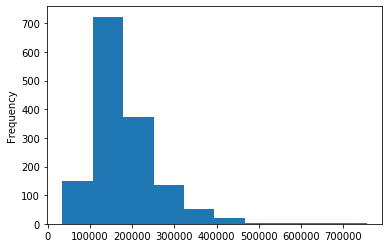

In [8]:
df_train['SalePrice'].plot.hist()

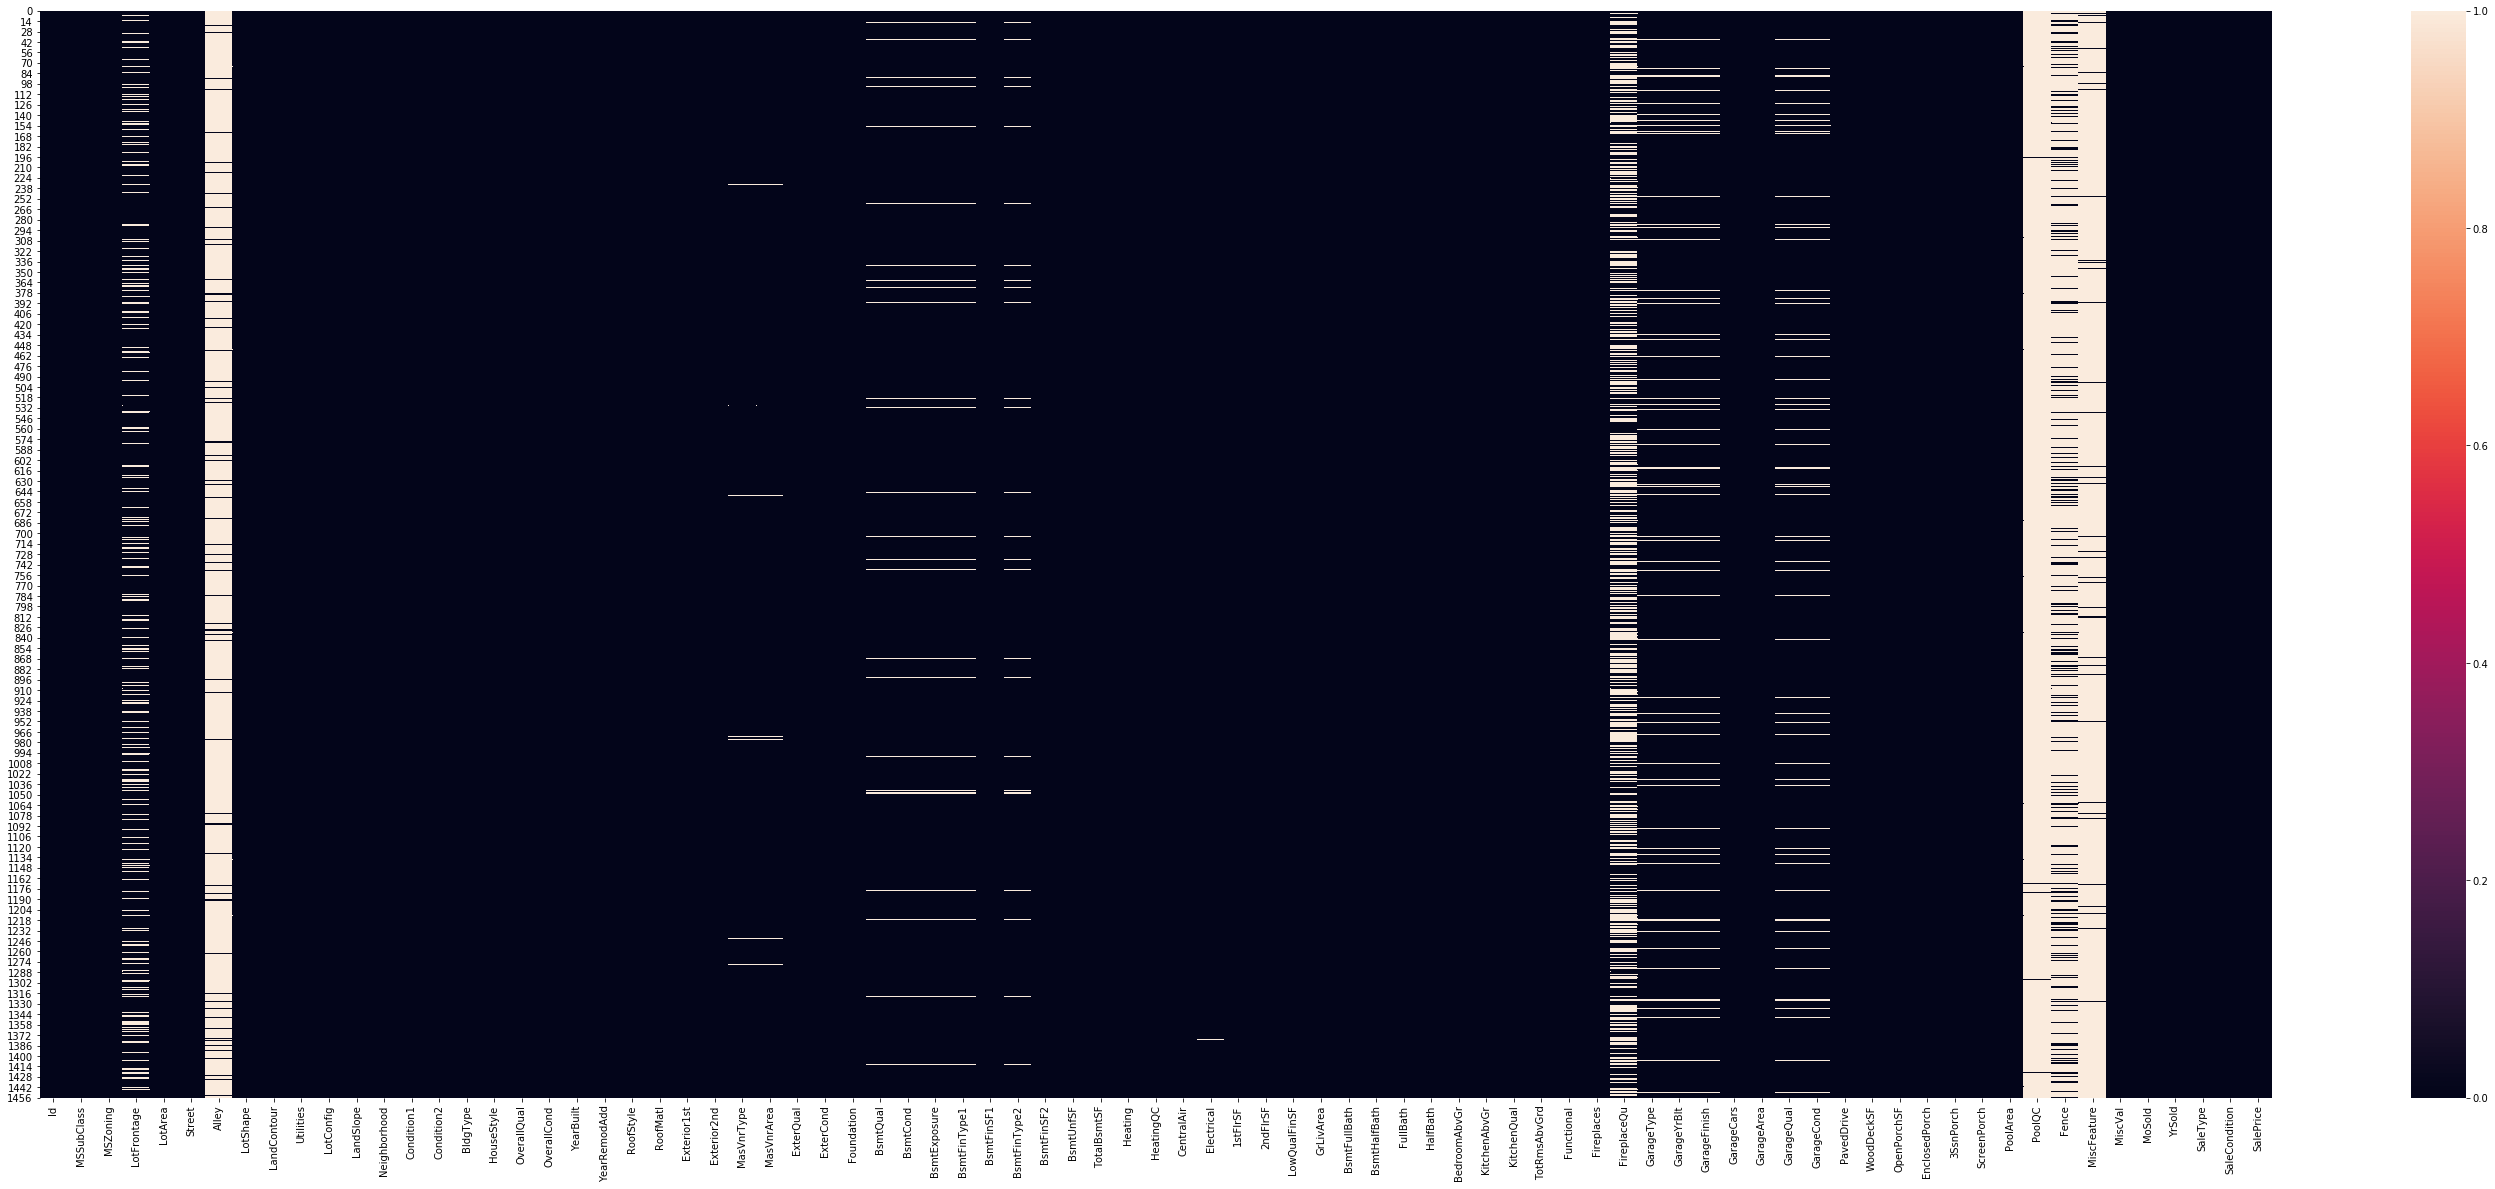

In [9]:
plt.figure(figsize=(50, 20))
sea.heatmap(df_train.isna())

We can see that in general our dataframe is not too sparse and there seem to be some particular variables that are missing in almost every instance. Let's determine all the variables that are missing in over 20% of the instances and we will not include those variables in our analyses. 

In [10]:
missing = (df_train.isna().sum()/len(df_train)).sort_values(ascending=False)
missing = missing[missing > 0.2]
cols_to_drop = list(missing.index)

for i in cols_to_drop: 
    df_train.drop([i], 1, inplace = True)
    if i in cat_cols: 
        cat_cols.remove(i)
    if i in num_cols: 
        num_cols.remove(i)

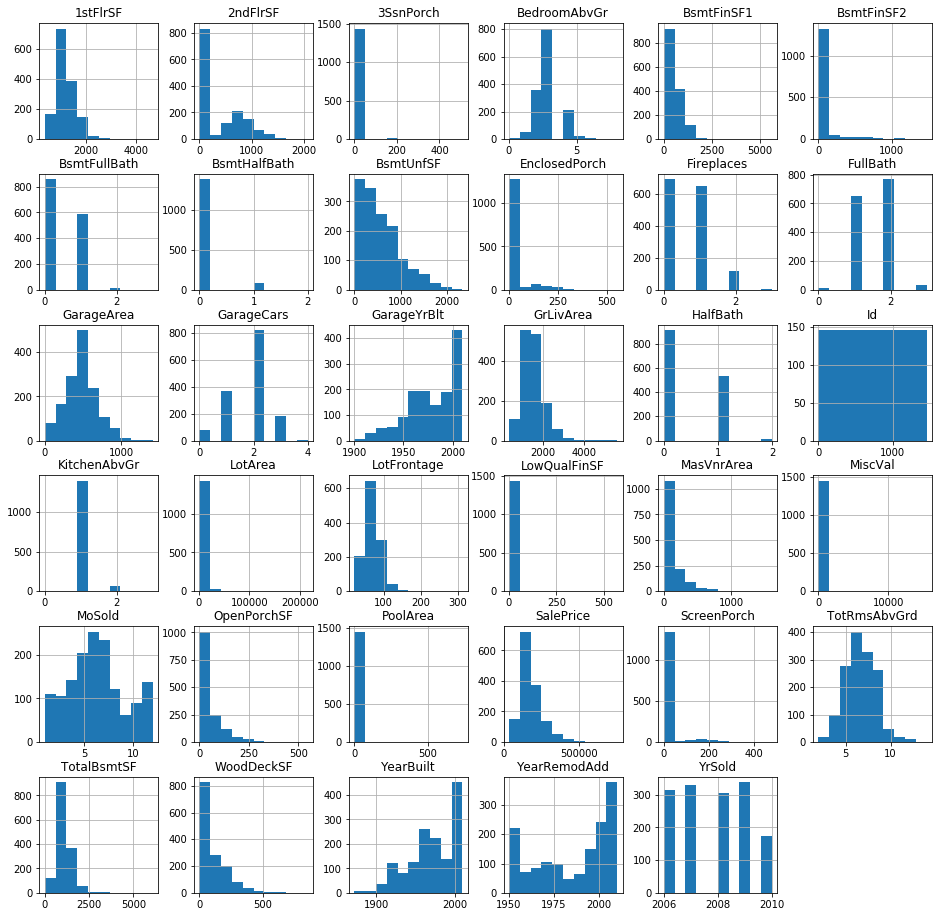

In [11]:
# Lets look at the distribution of our numerical data
df_train[num_cols].hist(figsize=(16, 16))
plt.show()

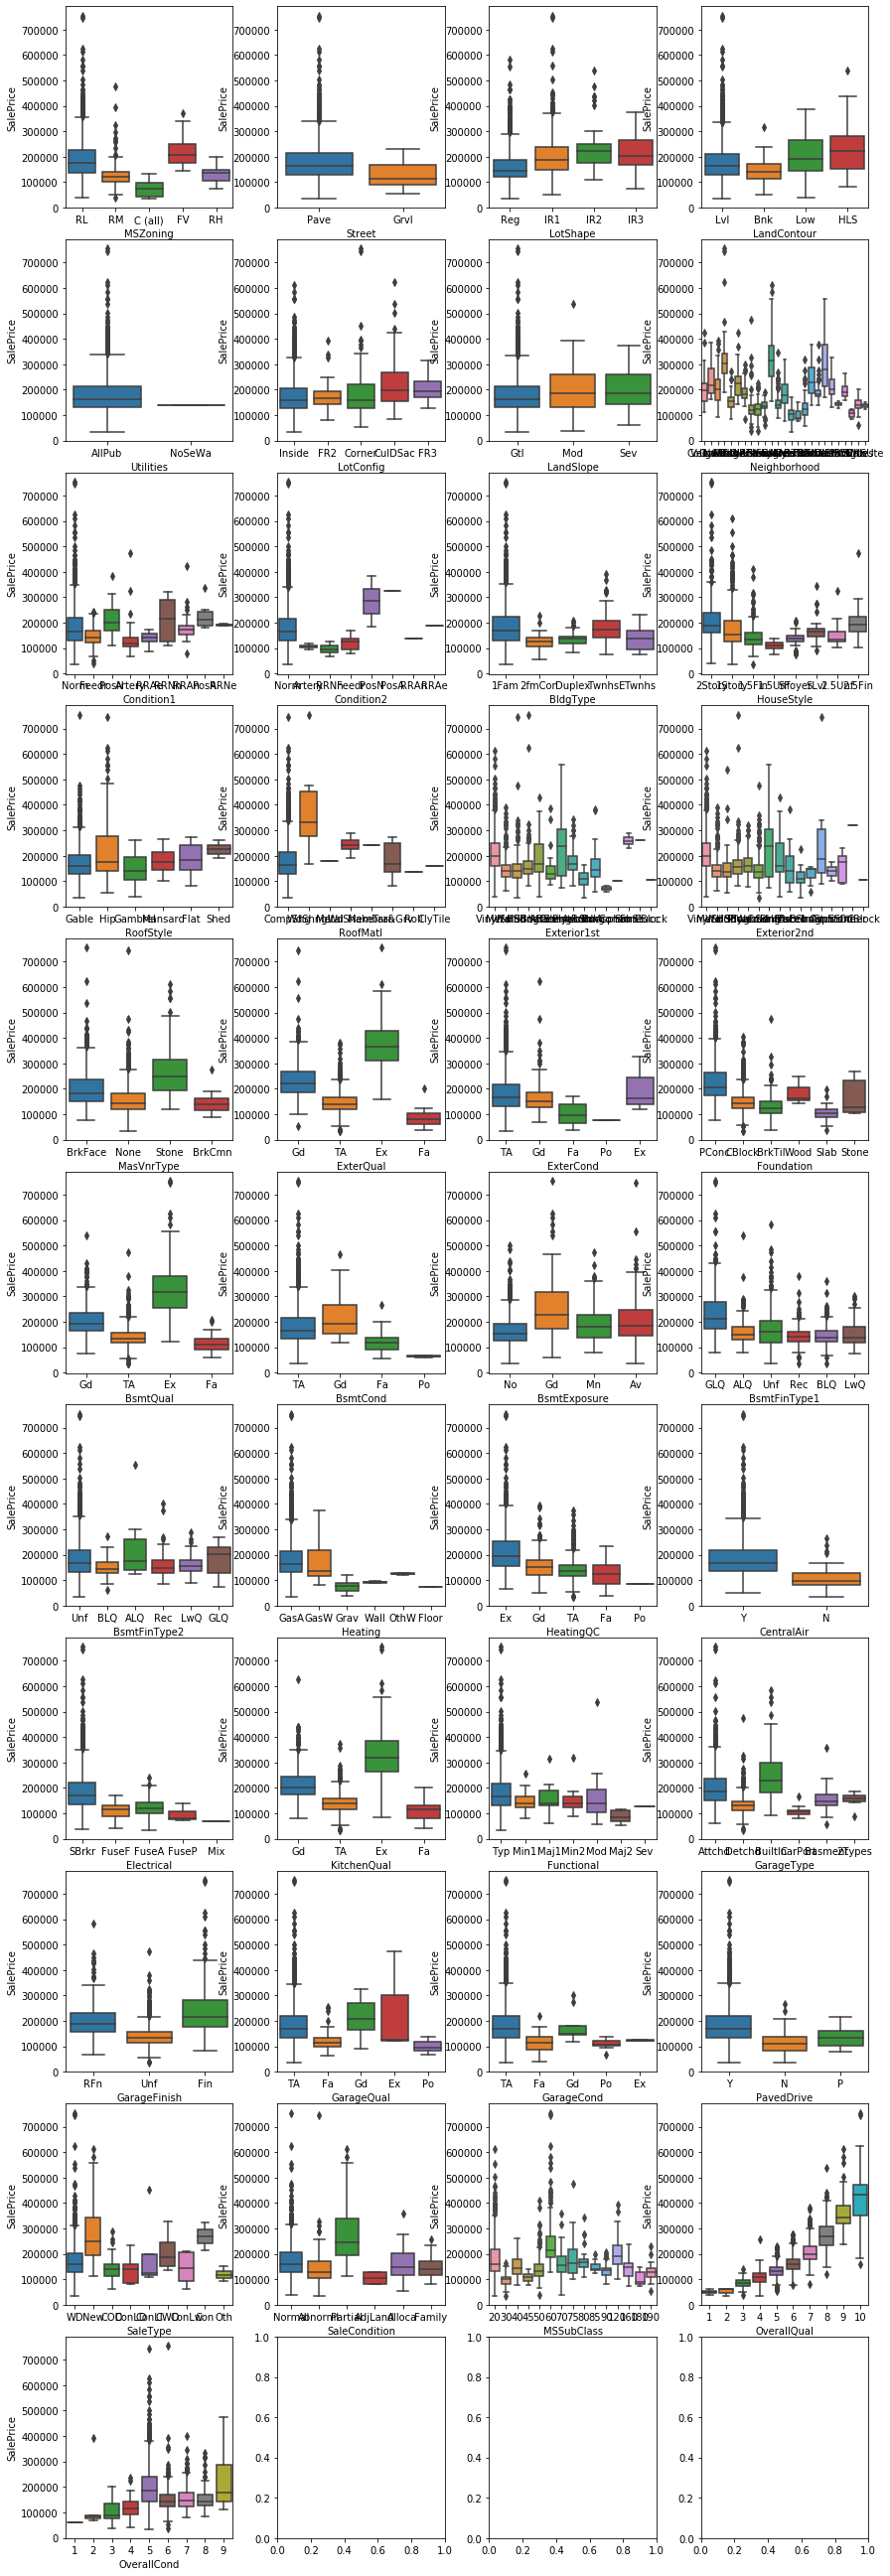

In [12]:
# Lets looks at the distribution of our categorical variables
fig, axes = plt.subplots(11, 4, figsize=(12, 36))
fig.tight_layout()
axes = axes.reshape(-1)

for i, col in enumerate(cat_cols):
    sea.boxplot(x=col, y='SalePrice', data=df_train, ax=axes[i])

## Correlations
Lets inspect some preliminary correlations of variables to saleprice

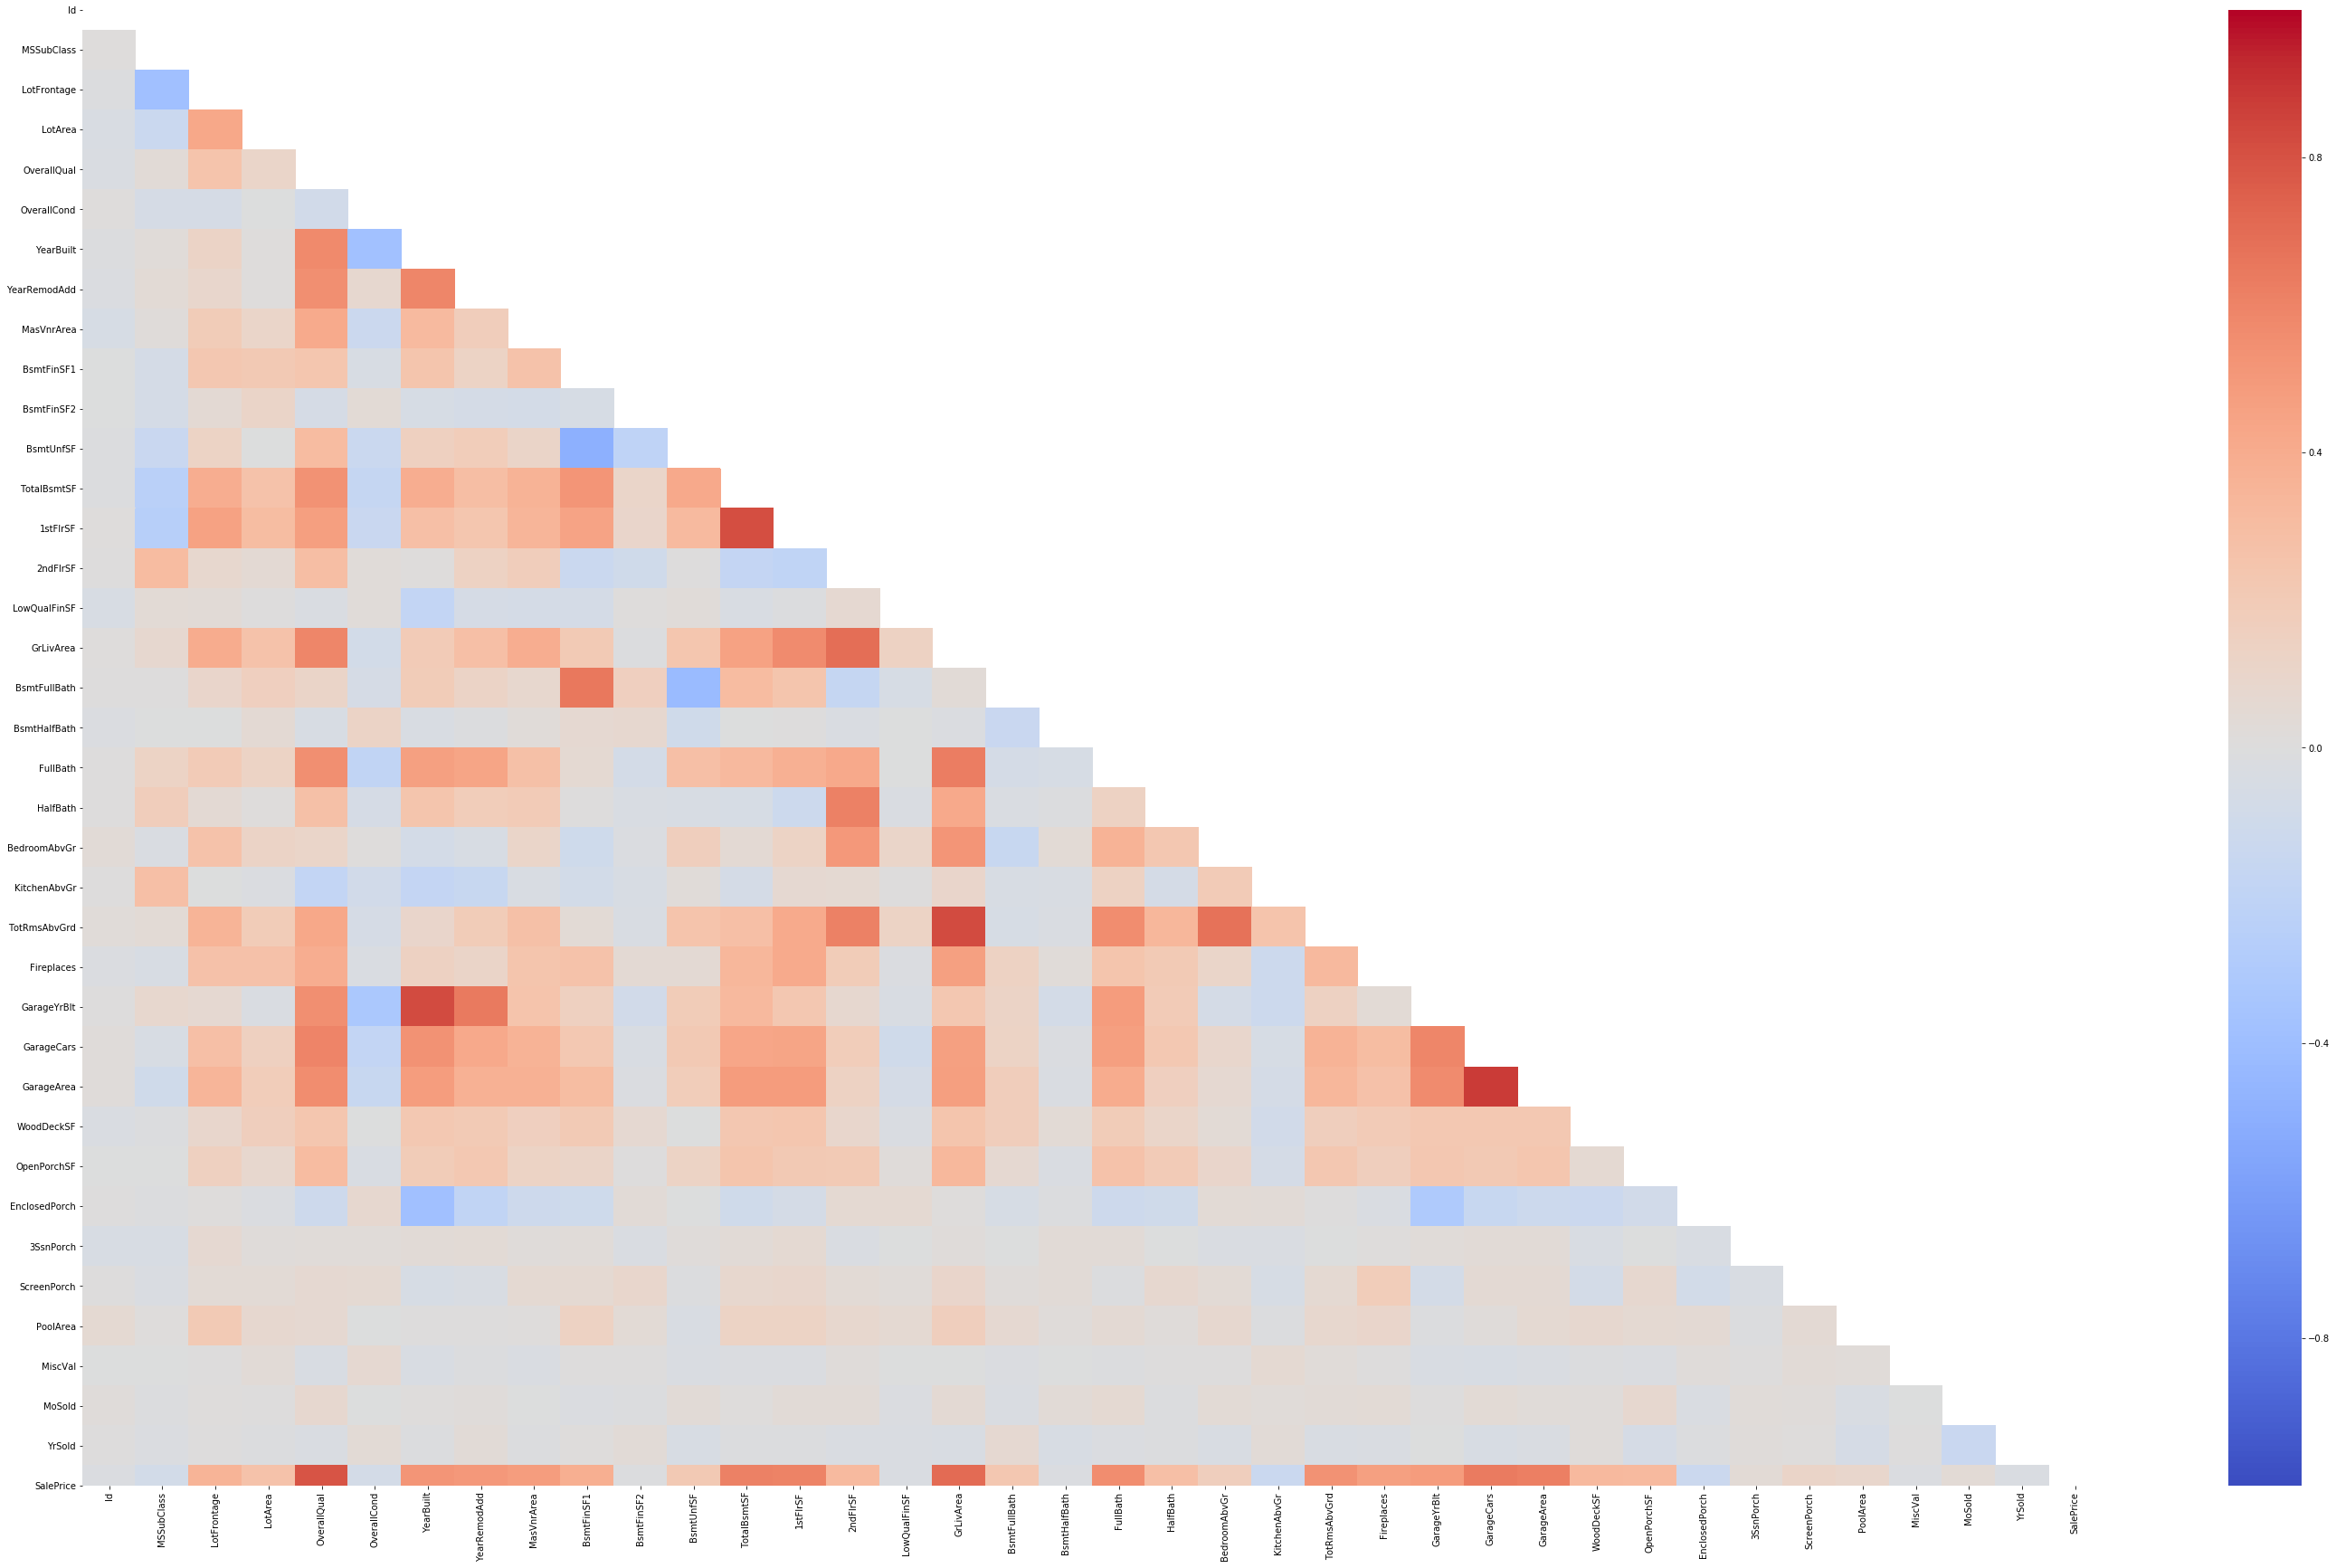

In [13]:
corr = df_train.corr()
fig, ax = plt.subplots(figsize=(50, 30))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
ax = sea.heatmap(corr,  vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask = mask)

In [14]:
#Let's inspect the exact correlations...
corr = df_train.corr()
corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

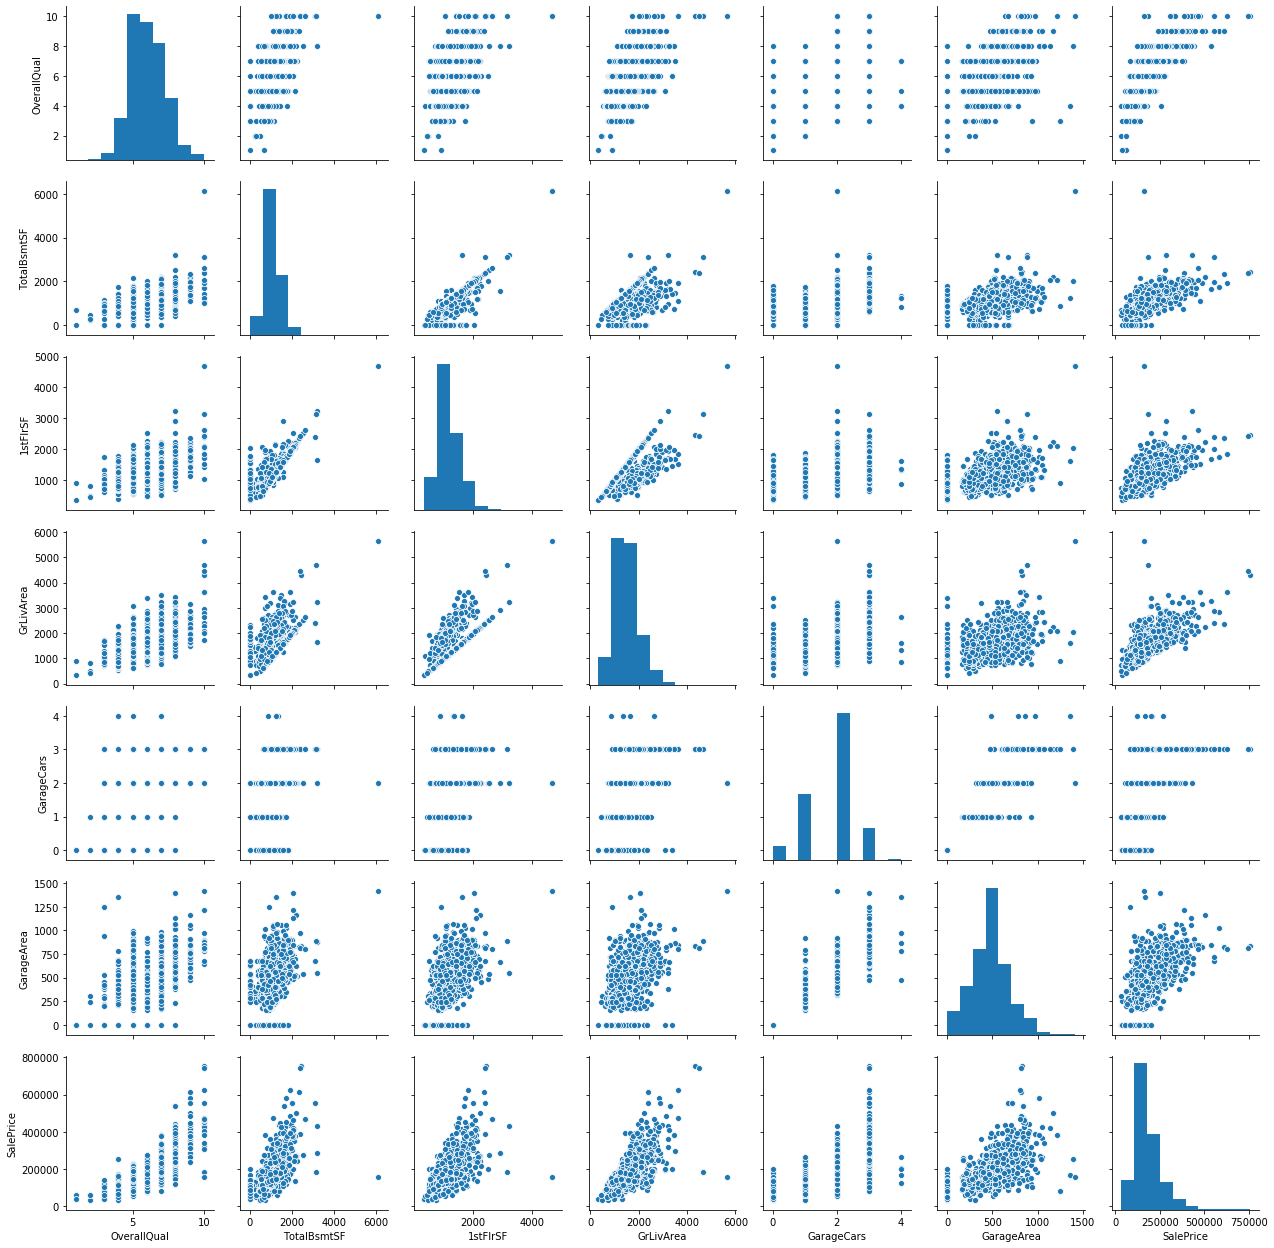

In [15]:
# Let's look at the items more strongly correlated
sea.pairplot(df_train[corr[corr['SalePrice'] > .6].index])

# Data Preparation

In [16]:
#Let's impute with the median for missing values of numerical columns in our dataframe
for i in num_cols: 
    df_train[i].fillna(df_train[i].median(), inplace = True)
    if i != 'SalePrice':
        df_test[i].fillna(df_test[i].median(), inplace = True)
df_num = df_train[num_cols]

In [17]:
# we will fill our missing categorical data with dummy values...
for i in cat_cols: 
    df_train[i].fillna(-999999, inplace = True)
    df_test[i].fillna(-999999, inplace = True)
df_cat = df_train[cat_cols]

In [18]:
def make_numeric(df, feature):
    unique_values =  pd.unique(df[feature])
    feature_dict = {}
    count = 1
    for item in unique_values:
        if item == 'nan': 
            feature_dict[item] = -999999
        else:
            feature_dict[item] = count
            count = count+1 
    df[feature] = [feature_dict[i] for i in df[feature]]
    return df

In [19]:
#Let's convert our categorical text variables to be numeric variables...
df_train.head()
text_cols = list(df_train.select_dtypes('object').columns)

for col in text_cols: 
    make_numeric(df_train, col)
    
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,1,65.0,8450,1,1,1,1,1,...,0,0,0,0,0,2,2008,1,1,208500
1,2,20,1,80.0,9600,1,1,1,1,2,...,0,0,0,0,0,5,2007,1,1,181500
2,3,60,1,68.0,11250,1,2,1,1,1,...,0,0,0,0,0,9,2008,1,1,223500
3,4,70,1,60.0,9550,1,2,1,1,3,...,272,0,0,0,0,2,2006,1,2,140000
4,5,60,1,84.0,14260,1,2,1,1,2,...,0,0,0,0,0,12,2008,1,1,250000


# Feature Creation

In [20]:
#Let's get an age of the houses instead of just the year they were built and sold
df_train['Age_When_Sold'] = df_train['YrSold'] - df_train['YearBuilt']
df_test['Age_When_Sold'] = df_test['YrSold'] - df_test['YearBuilt']
num_cols.append('Age_When_Sold')

#Let's also check the correlation for this guy...
corr = df_train.corr()
corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
                   ...   
ExterQual       -0.265015
BsmtFinType1    -0.370971
HeatingQC       -0.427649
Foundation      -0.429678
Age_When_Sold   -0.523350
Name: SalePrice, Length: 77, dtype: float64

In [21]:
#Alright let's actually choose which features we think will be useful...
useful_features = ['OverallQual', '1stFlrSF', 'TotalBsmtSF','GrLivArea', 'GarageArea', 'FullBath', 'Age_When_Sold', 'SalePrice']
df_train_useful = df_train[useful_features]
useful_features_pred = ['Id','OverallQual', '1stFlrSF', 'TotalBsmtSF','GrLivArea', 'GarageArea', 'FullBath', 'Age_When_Sold']
df_use_predict = df_test[useful_features_pred]
df_train_useful.head()

,OverallQual,1stFlrSF,TotalBsmtSF,GrLivArea,GarageArea,FullBath,Age_When_Sold,SalePrice
0,7,856,856,1710,548,2,5,208500
1,6,1262,1262,1262,460,2,31,181500
2,7,920,920,1786,608,2,7,223500
3,7,961,756,1717,642,1,91,140000
4,8,1145,1145,2198,836,2,8,250000


# Regression Models

In [22]:
#We're going to keep track of our model names and their performances
modelsRMSE = {}
modelsAcc = {}
modelsAccT = {}

In [23]:
#Here we will separate our x and our y values (features and labels)
X = np.array(df_train_useful.drop(['SalePrice'], 1))
y = np.array(df_train_useful['SalePrice'])

#cross validation split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

X_predict = np.array(df_use_predict.drop(['Id'], 1))

In [24]:
modelLR = LinearRegression(n_jobs = -1)
modelLR.fit(X_train, y_train)

print("Let's look at our metrics...")
y_pred = modelLR.predict(X_test)
print("Root mean squared error = ", np.sqrt(mean_squared_error(y_test, y_pred)))

print('Accuracy: ', modelLR.score(X_train,y_train), ' on our training data.')
print('Accuracy: ', modelLR.score(X_test,y_test), ' on our test data.')

#Add to dicts
modelsRMSE['modelLR'] = np.sqrt(mean_squared_error(y_test, y_pred))
modelsAcc['modelLR'] = modelLR.score(X_train,y_train)
modelsAccT['modelLR'] = modelLR.score(X_test,y_test)

Let's look at our metrics...
Root mean squared error =  35149.470519841525
Accuracy:  0.7598233353005659  on our training data.
Accuracy:  0.8000708327624361  on our test data.


In [25]:
modelR = Ridge()
modelR.fit(X_train, y_train)

print("Let's look at our metrics...")
y_pred = modelR.predict(X_test)
print("Root mean squared error = ", np.sqrt(mean_squared_error(y_test, y_pred)))

print('Accuracy: ', modelR.score(X_train,y_train), ' on our training data.')
print('Accuracy: ', modelR.score(X_test,y_test), ' on our test data.')

#Add to dict
modelsRMSE['modelR'] = np.sqrt(mean_squared_error(y_test, y_pred))
modelsAcc['modelR'] = modelR.score(X_train,y_train)
modelsAccT['modelR'] = modelR.score(X_test,y_test)

Let's look at our metrics...
Root mean squared error =  35149.32971243099
Accuracy:  0.7598232506301539  on our training data.
Accuracy:  0.8000724345761491  on our test data.


# Random Forests

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
useful_features = ['1stFlrSF', 'TotalBsmtSF','GrLivArea', 'GarageArea', 'Age_When_Sold', 'SalePrice']
useful_features_pred = ['Id','1stFlrSF', 'TotalBsmtSF','GrLivArea', 'GarageArea', 'Age_When_Sold']
df_train_trees = df_train[useful_features]
df_use_predict = df_test[useful_features_pred]
df_train_trees.head()

,1stFlrSF,TotalBsmtSF,GrLivArea,GarageArea,Age_When_Sold,SalePrice
0,856,856,1710,548,5,208500
1,1262,1262,1262,460,31,181500
2,920,920,1786,608,7,223500
3,961,756,1717,642,91,140000
4,1145,1145,2198,836,8,250000


In [27]:
#Here we will separate our x and our y values (features and labels)
X = np.array(df_train_trees.drop(['SalePrice'], 1))
y = np.array(df_train_trees['SalePrice'])

#cross validation split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

X_predict = np.array(df_use_predict.drop(['Id'], 1))


In [28]:
tree_reg = DecisionTreeRegressor(max_depth =7)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [29]:
print("Let's look at our metrics...")
y_pred = tree_reg.predict(X_test)
print("Root mean squared error = ", np.sqrt(mean_squared_error(y_test, y_pred)))

print('Accuracy: ', tree_reg.score(X_train,y_train), ' on our training data.')
print('Accuracy: ', tree_reg.score(X_test,y_test), ' on our test data.')

#Add to dict
modelsRMSE['tree_reg'] = np.sqrt(mean_squared_error(y_test, y_pred))
modelsAcc['tree_reg'] = tree_reg.score(X_train,y_train)
modelsAccT['tree_reg'] = tree_reg.score(X_test,y_test)

Let's look at our metrics...
Root mean squared error =  41483.537201912615
Accuracy:  0.917064486447715  on our training data.
Accuracy:  0.7215224794871089  on our test data.


In [30]:
rnd_forest = RandomForestRegressor(n_estimators=500, max_depth = 10, n_jobs=-1, random_state=123)
rnd_forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
                      oob_score=False, random_state=123, verbose=0,
                      warm_start=False)

In [31]:
print("Let's look at our metrics...")
y_pred = rnd_forest.predict(X_test)
print("Root mean squared error = ", np.sqrt(mean_squared_error(y_test, y_pred)))

print('Accuracy: ', rnd_forest.score(X_train,y_train), ' on our training data.')
print('Accuracy: ', rnd_forest.score(X_test,y_test), ' on our test data.')

#Add to dict
modelsRMSE['rnd_forest'] = np.sqrt(mean_squared_error(y_test, y_pred))
modelsAcc['rnd_forest'] = rnd_forest.score(X_train,y_train)
modelsAccT['rnd_forest'] = rnd_forest.score(X_test,y_test)



Let's look at our metrics...
Root mean squared error =  33472.62262521982
Accuracy:  0.9606703218474361  on our training data.
Accuracy:  0.8186915417696763  on our test data.


In [32]:
for name, score in zip(df_train_trees.columns, rnd_forest.feature_importances_):
    print(name, ":  ", score)

1stFlrSF :   0.08021818824259061
TotalBsmtSF :   0.1685209561379296
GrLivArea :   0.3304075192335659
GarageArea :   0.15394246957745594
Age_When_Sold :   0.2669108668084579


# Gradient Boosting

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
grbst = GradientBoostingRegressor(max_depth=7, n_estimators=3, learning_rate=1.0, random_state = 123)
grbst.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=1.0, loss='ls', max_depth=7,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='auto',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [34]:
print("Let's look at our metrics...")
y_pred = grbst.predict(X_test)
print("Root mean squared error = ", np.sqrt(mean_squared_error(y_test, y_pred)))

print('Accuracy: ', grbst.score(X_train,y_train), ' on our training data.')
print('Accuracy: ', grbst.score(X_test,y_test), ' on our test data.')

#Add to dict
modelsRMSE['grbst'] = np.sqrt(mean_squared_error(y_test, y_pred))
modelsAcc['grbst'] = grbst.score(X_train,y_train)
modelsAccT['grbst'] = grbst.score(X_test,y_test)

Let's look at our metrics...
Root mean squared error =  43710.86170659806
Accuracy:  0.958222631653271  on our training data.
Accuracy:  0.690815781285429  on our test data.


In [37]:
# Let's rank the models by their RMSE
print("Ranked by RMSE...")
modelstup = sorted(modelsRMSE.items() ,  key=lambda x: x[1] )

for elem in modelstup:
    print(elem[0] , " : " , elem[1] )    

# Let's rank the models by their accuracy on the training set
print("Ranked by Training Accuracy...")
modelstup = sorted(modelsAcc.items() ,  key=lambda x: x[1] )
 
for elem in modelstup:
    print(elem[0] , " : " , elem[1] )    

# Let's rank the models by their accuracy on the test set
print("Ranked by Testing Accuracy...")
modelstup = sorted(modelsAccT.items() ,  key=lambda x: x[1] )
 
for elem in modelstup:
    print(elem[0] , " : " , elem[1] ) 

Ranked by RMSE...
rnd_forest  :  33472.62262521982
modelR  :  35149.32971243099
modelLR  :  35149.470519841525
tree_reg  :  41483.537201912615
grbst  :  43710.86170659806
Ranked by Training Accuracy...
modelR  :  0.7598232506301539
modelLR  :  0.7598233353005659
tree_reg  :  0.917064486447715
grbst  :  0.958222631653271
rnd_forest  :  0.9606703218474361
Ranked by Testing Accuracy...
grbst  :  0.690815781285429
tree_reg  :  0.7215224794871089
modelLR  :  0.8000708327624361
modelR  :  0.8000724345761491
rnd_forest  :  0.8186915417696763


# Predictions

In [36]:
forecast_set = grbst.predict(X_predict)
submission_id = np.array(df_test['Id'])
submission_set = np.column_stack((submission_id,forecast_set))
#np.savetxt('Breeden_Sub4.csv', submission_set, delimiter=',', fmt='%d')

As is shown in the included screen shot, my best-performing model the gradient boosting model, (closely followed by decision tree and random-forests). The ridge regression, though the best of the regression models, was pretty poorly performing compared to the tree models.

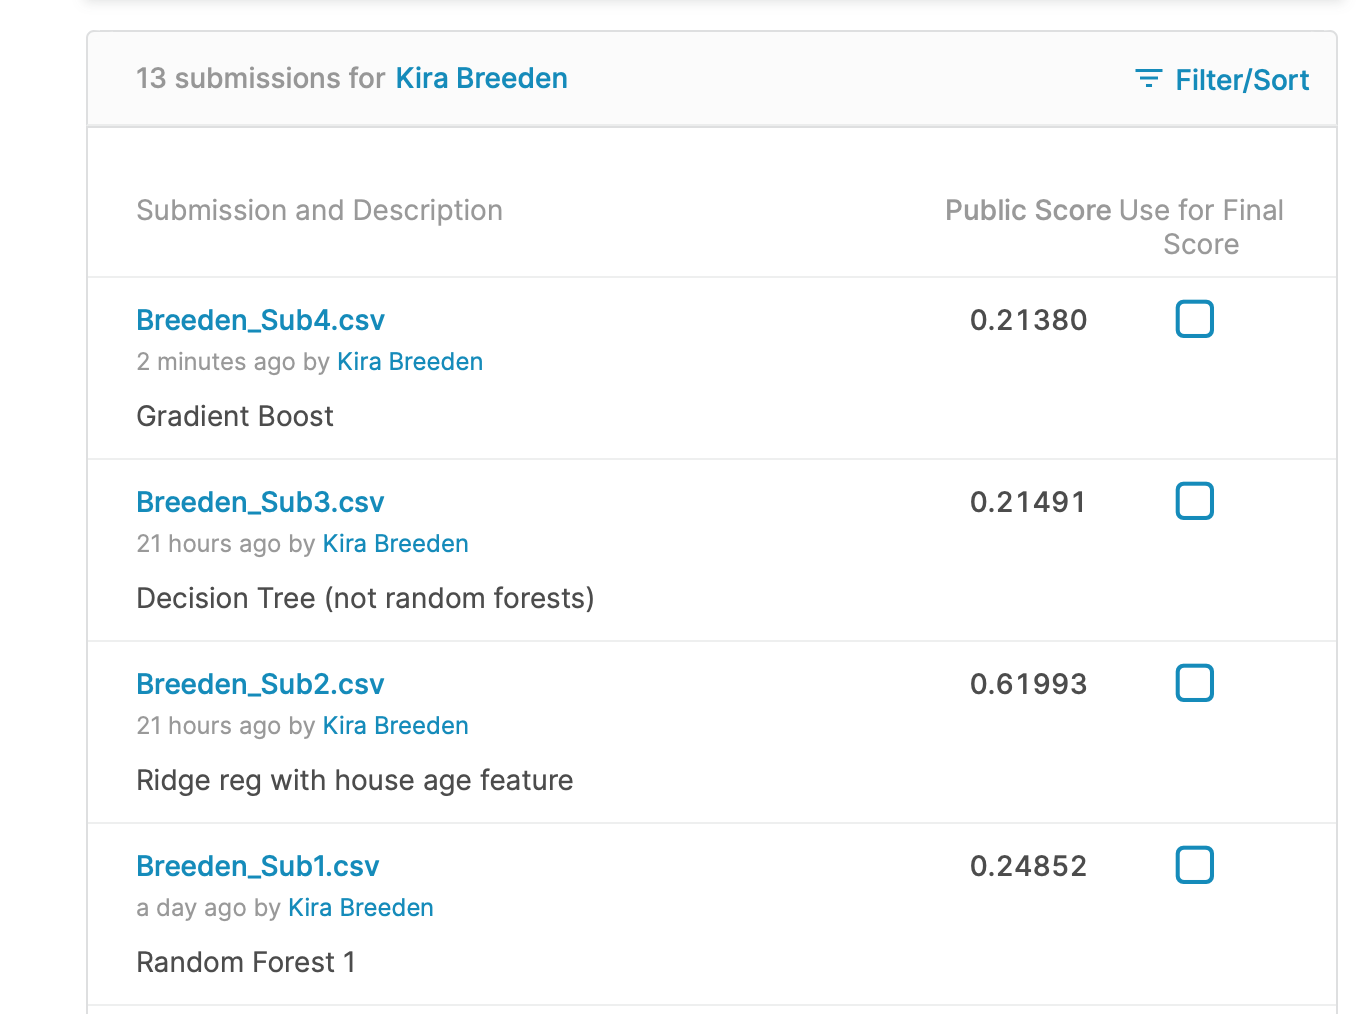

# Management Problems

Regarding the management problem, imagine that you again are advising a real estate brokerage firm in its attempt to employ machine learning methods. The firm wants to use machine learning to complement conventional methods for assessing the market value of residential real estate. Of the modeling methods examined in your study, which would you recommend to management and why? Reviewing the results of the random forests and gradient boosting model you have selected to present to management, which explanatory variables are most important in predicting home prices?

I would absolutely recommend using random forests and using gradient boosting for those forests as well. Linear regression (lasso, ridge, normal, etc) just does not have the power that decision trees and random forests do. With this dataset in particular, there is a large amount of categorical data that is better handled by trees. Not only that but the combination of datatypes is better handled by random forests. Of course when using random forests and decision trees we always need to be careful to avoid overfitting but this can be easily remedied by seting leaf_node limits or tree_depth limits. Using ensemble methods just gives more power and a better training process for the model. 

Not only are gradient boosting and random forests the best choice for this brokerage firm, but we can see from our analyses that the age of the house is an important feature, along with GrLivArea and TotalBsmtSF. 